In [1]:
%matplotlib inline

In [18]:
import pickle as pkl
import pandas as pd
from datetime import  datetime, timedelta
from copy import copy

from core import  do_simulation
from helpers import Params, plot_total, T, data2df, enhance_total, save_to_json, save_bundle
from const import  STATE

In [19]:
p0_time = pkl.load(open('output/p0_time.pkl', 'rb'))
lockdown_time = T('23/01/2020')

In [20]:
p0_time

datetime.datetime(2019, 11, 28, 0, 0)

In [36]:
print(bed_info_raw)

[(datetime.datetime(2019, 11, 28, 0, 0), 3000), (datetime.datetime(2020, 1, 25, 0, 0), 1000), (datetime.datetime(2020, 1, 31, 0, 0), 6000), (datetime.datetime(2020, 2, 4, 0, 0), 1000), (datetime.datetime(2020, 2, 7, 0, 0), 2000), (datetime.datetime(2020, 2, 11, 0, 0), 6000), (datetime.datetime(2020, 2, 17, 0, 0), 11000), (datetime.datetime(2020, 2, 21, 0, 0), 11000)]


In [21]:
bed_info_raw = [
    (p0_time, 3000), # 3000),
    (T('25/01/2020'), 1000), # 4000),    
    (T('31/01/2020'), 6000), # 10000),
    (T('04/02/2020'), 1000), #  11000),
    (T('07/02/2020'), 2000), # 13000)
    (T('11/02/2020'), 6000),  # 19000
    (T('17/02/2020'), 11000),  # 28000
    (T('21/02/2020'), 11000),  # 39000
]
pkl.dump(bed_info_raw, open('data/bed_info_raw.pkl', 'wb'))
# number of new beds at  some days
bed_info = [((d-p0_time).days, n) for d, n in bed_info_raw]
pkl.dump(bed_info, open('data/bed_info.pkl', 'wb'))
print(bed_info)

[(0, 3000), (58, 1000), (64, 6000), (68, 1000), (71, 2000), (75, 6000), (81, 11000), (85, 11000)]


In [22]:
params_before = pkl.load(
    open('output/params_before_lockdown.pkl', 'rb')
)

params_after = pkl.load(
    open('output/params_after_lockdown.pkl', 'rb')
)

In [23]:
days_before_ld  = (lockdown_time -  p0_time).days
days_before_ld

56

In [24]:
total_days = 360

In [25]:
offset = 14
n_offsets = 10
days_offsets = list(range(offset, offset*n_offsets+1, offset))
fine_grained_alpha = [(0, params_before.alpha), (days_before_ld, params_after.alpha)]
fine_grained_alpha += [
    (days_before_ld + i, params_after.alpha) for i in days_offsets
]
fine_grained_beta = [(0, params_before.beta), (days_before_ld, params_after.beta)]
fine_grained_beta += [
    (days_before_ld + i, params_after.beta) for i in days_offsets
]


In [27]:
params = Params(
    total_population=params_before.total_population,
    initial_num_E=params_before.initial_num_E,
    initial_num_I=params_before.initial_num_I,
    initial_num_M=params_before.initial_num_M,  
    mu_ei=params_after.mu_ei,
    mu_mo=params_after.mu_mo,
    k_days=params_after.k_days,
    x0_pt=params_after.x0_pt,
    alpha=fine_grained_alpha,
    beta=fine_grained_beta,
    stages=[days_before_ld] + [(days_before_ld + i) for i in range(offset, offset*n_offsets+1, offset)]
)

total, delta, increase, trans_data, stats = do_simulation(total_days, bed_info, params, p0_time=p0_time, verbose=0)

O fraction  0.9900247643734955


In [28]:
stats

{'R0_by_stage': {0: (5.142636306099425, 2.067445084735255, 2.637939350215837),
  1: (5.824977867131396, 3.8014055724111, 1.9457440033666713),
  2: (6.0989464743771515, 4.057828873184425, 1.9948589276289654),
  3: (6.189716326333128, 1.0001229028877257, 1.9202598904655022),
  4: (6.193187301686083, 1.0000000075442663, 1.9207638019242381),
  5: (6.194070765499293, 1.0000000017270587, 1.920892966992439),
  6: (6.194630824634389, 1.0000000006857295, 1.9209748494000372),
  7: (6.1949848449543286, 1.000000000384163, 1.9210266082949474),
  8: (6.195208416380225, 1.000000000266945, 1.921059295149449),
  9: (6.195349522703444, 1.0000000002123144, 1.9210799253438624),
  10: (6.195410054661875, 1.0000000001923512, 1.9210887753093095),
  11: (nan, nan, nan)},
 'end_time': (183, '29/05/20'),
 'peak_time': (72, '08/02/20'),
 'when_dO_gt_dI': (73, '09/02/20'),
 'when_dO_gt_dE': (72, '08/02/20'),
 'turning_time_real': (78, '14/02/20'),
 'turning_time_theory': (82, '18/02/20')}

In [29]:
params

total_population: 9000000
initial_num_E: 1
initial_num_I: 0
initial_num_M: 0

alpha: [(0, 3.1998106751467885e-08), (56, 1.5999999999999998e-08), (70, 1.5999999999999998e-08), (84, 1.5999999999999998e-08), (98, 1.5999999999999998e-08), (112, 1.5999999999999998e-08), (126, 1.5999999999999998e-08), (140, 1.5999999999999998e-08), (154, 1.5999999999999998e-08), (168, 1.5999999999999998e-08), (182, 1.5999999999999998e-08), (196, 1.5999999999999998e-08)]
beta:  [(0, 3.3997988423434626e-09), (56, 1.7e-09), (70, 1.7e-09), (84, 1.7e-09), (98, 1.7e-09), (112, 1.7e-09), (126, 1.7e-09), (140, 1.7e-09), (154, 1.7e-09), (168, 1.7e-09), (182, 1.7e-09), (196, 1.7e-09)]

mu_ei: 6

x0_pt: 3000
k_pt:  0.0005972530000000001

mu_mo: 10

k_days: 14
        

In [31]:
stats

{'R0_by_stage': {0: (5.142636306099425, 2.067445084735255, 2.637939350215837),
  1: (5.824977867131396, 3.8014055724111, 1.9457440033666713),
  2: (6.0989464743771515, 4.057828873184425, 1.9948589276289654),
  3: (6.189716326333128, 1.0001229028877257, 1.9202598904655022),
  4: (6.193187301686083, 1.0000000075442663, 1.9207638019242381),
  5: (6.194070765499293, 1.0000000017270587, 1.920892966992439),
  6: (6.194630824634389, 1.0000000006857295, 1.9209748494000372),
  7: (6.1949848449543286, 1.000000000384163, 1.9210266082949474),
  8: (6.195208416380225, 1.000000000266945, 1.921059295149449),
  9: (6.195349522703444, 1.0000000002123144, 1.9210799253438624),
  10: (6.195410054661875, 1.0000000001923512, 1.9210887753093095),
  11: (nan, nan, nan)},
 'end_time': (183, '29/05/20'),
 'peak_time': (72, '08/02/20'),
 'when_dO_gt_dI': (73, '09/02/20'),
 'when_dO_gt_dE': (72, '08/02/20'),
 'turning_time_real': (78, '14/02/20'),
 'turning_time_theory': (82, '18/02/20')}

In [32]:
p0_time + timedelta(days=total_days)

datetime.datetime(2020, 11, 22, 0, 0)

/home/cloud-user/code/covid-19/helpers.py:285: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf['index'] = df.index
/home/cloud-user/code/covid-19/helpers.py:286: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf['value'] = subdf[state].copy()
/home/cloud-user/code/covid-19/helpers.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas

['28/11/19' '08/02/20' '20/04/20' '01/07/20' '11/09/20' '22/11/20']


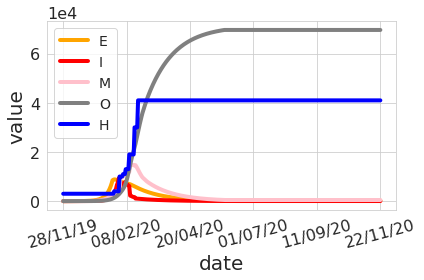

In [33]:
from helpers import plot_total
fig, ax = plot_total(total, p0_time, total_days)
fig.savefig('figs/start2end.pdf')

In [34]:
save_bundle([total, delta, increase, trans_data], p0_time, total_days, 'output/tbl/start2end')

In [35]:
path = 'output/tbl/start2end/stats.txt'
save_to_json(stats, path)